<a href="https://colab.research.google.com/github/gmshashank/Backpropagation/blob/main/NN_backpropagation_Micrograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2-4*x+5

In [3]:
f(3.0)

20.0

In [4]:
xs=np.arange(-5,5,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys=f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

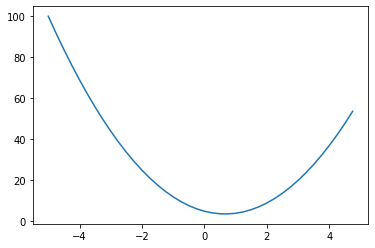

In [6]:
plt.plot(xs,ys)

In [7]:
h=0.001
x=3.0
f(x)

20.0

In [8]:
f(x+h)

20.014003000000002

In [9]:
f(x+h)-f(x)

0.01400300000000243

In [10]:
h=0.001
x=3.0
(f(x+h)-f(x))/h

14.00300000000243

In [11]:
for i in range(0,18):
  h=1/(10**i)
  derivative=(f(x+h)-f(x))/h
  print(derivative)

17.0
14.300000000000068
14.029999999999632
14.00300000000243
14.000300000063248
14.00003000000538
14.000003002223593
14.000000305713911
14.00000009255109
14.000001158365194
14.000001158365194
14.000178794049134
14.001244608152774
13.997691894473974
14.210854715202004
10.658141036401503
0.0
0.0


In [12]:
# f(x)=3*x**2-4*x+5
# f'(x)=6*x-4
# minima = f'(x)=0
# 6*x-4=0
# x=2/3
h=0.00001
x=2/3
print((f(x+h)-f(x))/h)

3.0000002482211127e-05


In [13]:
a=2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [14]:
h=0.0001
a=2.0
b=-3.0
c=10.0
d1=a*b+c
print(f"d1: {d1}")
a+=h
d2=a*b+c
print(f"d2: {d2}")

print(f"slope: {(d2-d1)/h}")

d1: 4.0
d2: 3.999699999999999
slope: -3.000000000010772


In [15]:
h=0.0001
a=2.0
b=-3.0
c=10.0

d1=a*b+c
print(f"d1: {d1}")
b+=h
d2=a*b+c
print(f"d2: {d2}")

print(f"slope: {(d2-d1)/h}")

d1: 4.0
d2: 4.0002
slope: 2.0000000000042206


In [16]:
h=0.0001
a=2.0
b=-3.0
c=10.0
d1=a*b+c
print(f"d1: {d1}")

c+=h
d2=a*b+c
print(f"d2: {d2}")

print(f"slope: {(d2-d1)/h}")

d1: 4.0
d2: 4.0001
slope: 0.9999999999976694


In [17]:
class Value:
  def __init__(self,data,children={},_ops="",label=""):
    self.data=data
    self.grad=0.0
    self._backward=lambda:None
    self._prev=set(children)
    self._ops=_ops
    self.label=label
  
  def __repr__(self):
    return f"Value (data={self.data})"
  
  def __add__(self,other):
    out=Value(self.data + other.data,(self,other),"+")
    
    def _backward():
      self.grad=1.0*out.grad
      other.grad=1.0*out.grad
    out._backward =_backward
    
    return out

  def __mul__(self,other):
    out=Value(self.data*other.data,(self,other),"*")

    def _backward():
      self.grad=other.data*out.grad
      other.grad=self.data*out.grad    
    out._backward=_backward

    return out
  
  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),"tanh")

    def _backward():
      self.grad= (1-t**2)*out.grad
    out._backward=_backward

    return out

a=Value(2.0,label="a")
b=Value(-3.0,label="b")
c=Value(10.0,label="c")
print(a,b)
print(a+b)
print(a.__add__(b))

e=a*b;e.label="e"
d=e+c;d.label="d"
f=Value(-2.0,label="f")
L=d*f;L.label="L"

print(d)
print((a.__mul__(b)).__add__(c))

Value (data=2.0) Value (data=-3.0)
Value (data=-1.0)
Value (data=-1.0)
Value (data=4.0)
Value (data=4.0)


In [18]:
# last input values to get this output 
d._prev

{Value (data=-6.0), Value (data=10.0)}

In [19]:
# last operation performed
d._ops

'+'

In [20]:
# Visulaizing the maths operations graphs

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes,edges=set(),set()

  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child,v))
        build(child)
  
  build(root)
  return nodes,edges

def draw_dot(root):
  dot=Digraph(format="svg",graph_attr={"rankdir":"LR"}) # LR->left to right

  nodes,edges=trace(root)
  for n in nodes:
    uid=str(id(n))

    # for any value in graph create a rectangular ("record") node for it
    dot.node(name=uid,label="{%s | data %.4f | grad %.4f}" %(n.label,n.data,n.grad),shape="record")
    
    if n._ops:
      dot.node(name=uid+n._ops,label=n._ops)
      dot.edge(uid+n._ops,uid)
  
  for n1,n2 in edges:
    dot.edge(str(id(n1)),str(id(n2))+n2._ops)

  return dot

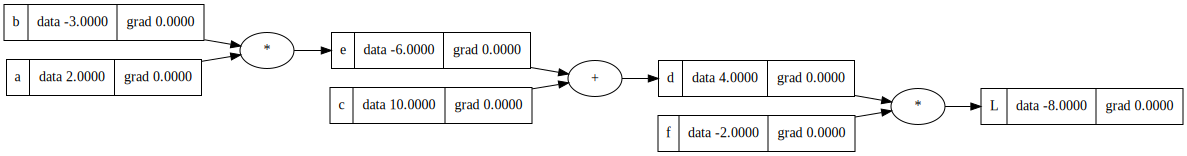

In [21]:
draw_dot(L)

In [22]:
def lol():
  h=0.0001
  a=Value(2.0,label="a")
  b=Value(-3.0,label="b")
  c=Value(10.0,label="c")
  e=a*b;e.label="e"
  d=e+c;d.label="d"
  f=Value(-2.0,label="f")
  L=d*f;L.label="L"
  L1=L.data

  a=Value(2.0,label="a")
  b=Value(-3.0,label="b")
  c=Value(10.0,label="c")
  e=a*b;e.label="e"
  d=e+c;d.label="d"
  f=Value(-2.0,label="f")
  L=d*f;L.label="L"
  L2=L.data + h

  print((L2-L1)/h)

lol()

0.9999999999976694


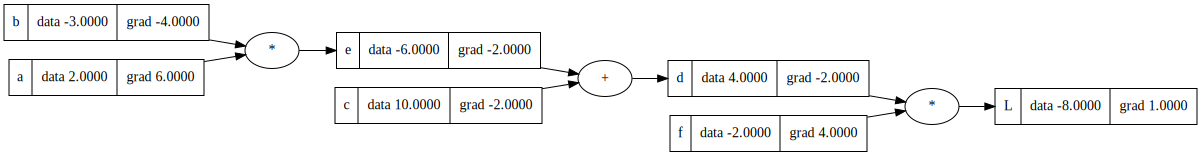

In [23]:
L.grad=1.0
f.grad=d.data
d.grad=f.data

c.grad=d.grad
e.grad=d.grad

a.grad=e.grad*b.data
b.grad=e.grad*a.data

draw_dot(L)

-7.286496


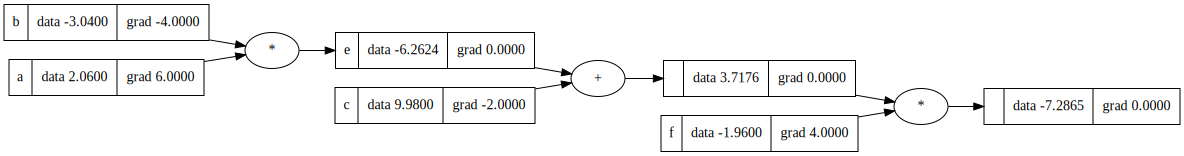

In [24]:
# giving a small nudge to inputs
delta=0.01
a.data +=delta*a.grad
b.data +=delta*b.grad
c.data +=delta*c.grad
f.data +=delta*f.grad

e=a*b;e.label="e"
d=e+c
L=d*f
print(L.data)

draw_dot(L)

In [25]:
# backpropagation For neural network

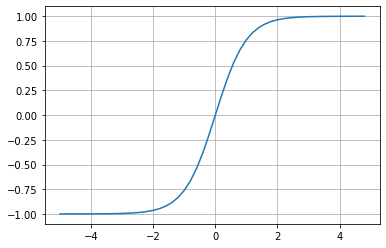

In [26]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)))
plt.grid()

In [27]:
# inputs x1,x2
x1=Value(2.0,label="x1")
x2=Value(0.0,label="x2")

# weights w1,w2
w1=Value(-3.0,label="w1")
w2=Value(1.0,label="w2")

# bias of neuron
b=Value(6.8813735870195432,label="b")

# x1*w1+x2*w2+b
x1w1=x1*w1;x1w1.label="x1*w1"
x2w2=x2*w2;x2w2.label="x2*w2"
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label="x1*w1+x2*w2"
n=x1w1x2w2 + b;label="n"
o=n.tanh();o.label="o"

In [28]:
# f(x)=tanh(x)
# f1(x)=1-tanh(x) **2
#      =1-f(x)**2

In [29]:
o.grad=1.0
n.grad=1-o.data**2
x1w1x2w2.grad=n.grad
b.grad=n.grad
x1w1.grad=x1w1x2w2.grad
x2w2.grad=x1w1x2w2.grad

x1.grad=x1w1.grad*w1.data
w1.grad=x1w1.grad*x1.data

x2.grad=x2w2.grad*w2.data
w2.grad=x2w2.grad*x2.data

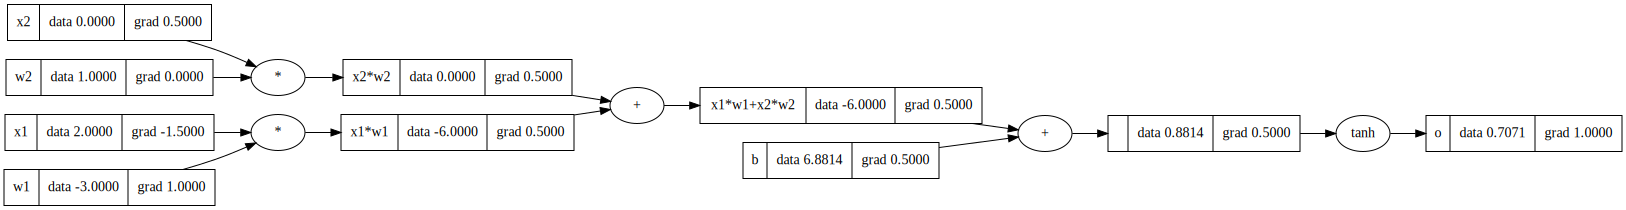

In [30]:
draw_dot(o)

In [31]:
# inputs x1,x2
x1=Value(2.0,label="x1")
x2=Value(0.0,label="x2")

# weights w1,w2
w1=Value(-3.0,label="w1")
w2=Value(1.0,label="w2")

# bias of neuron
b=Value(6.8813735870195432,label="b")

# x1*w1+x2*w2+b
x1w1=x1*w1;x1w1.label="x1*w1"
x2w2=x2*w2;x2w2.label="x2*w2"
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label="x1*w1+x2*w2"
n=x1w1x2w2 + b;label="n"
o=n.tanh();o.label="o"

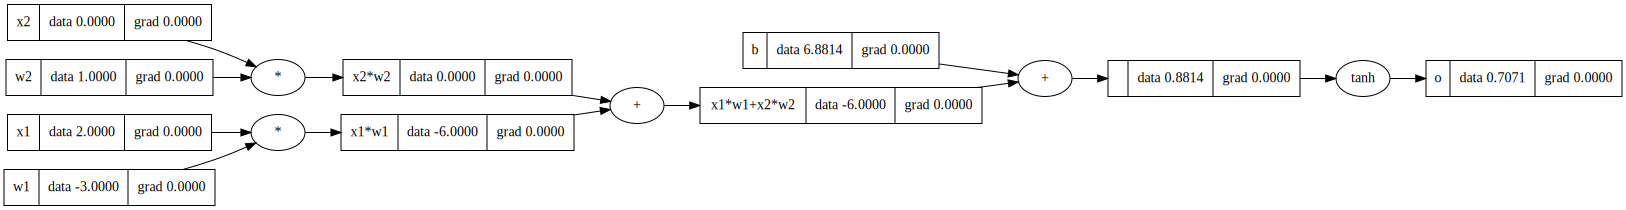

In [32]:
draw_dot(o)

In [33]:
o.grad=1.0
o._backward()

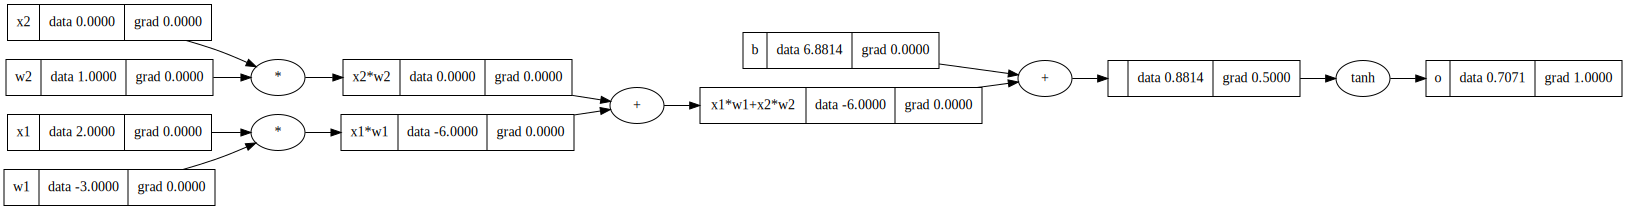

In [34]:
draw_dot(o)

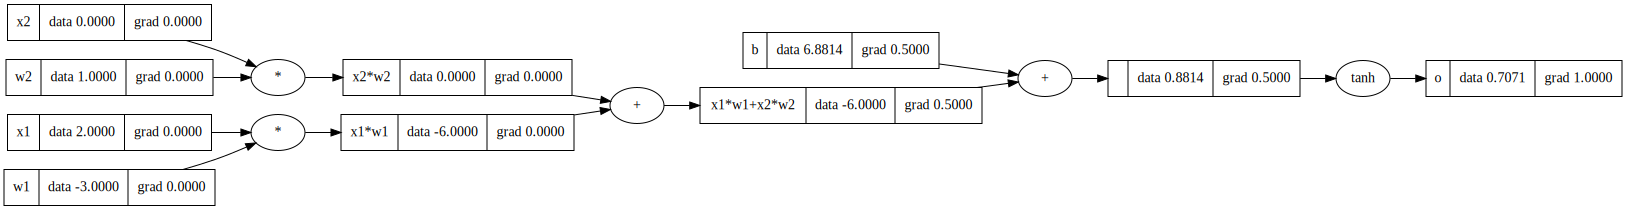

In [35]:
n._backward()
draw_dot(o)

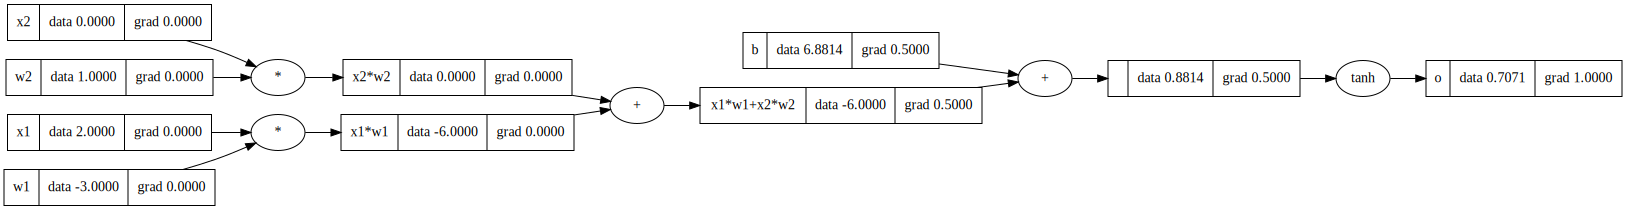

In [36]:
b._backward()
draw_dot(o)

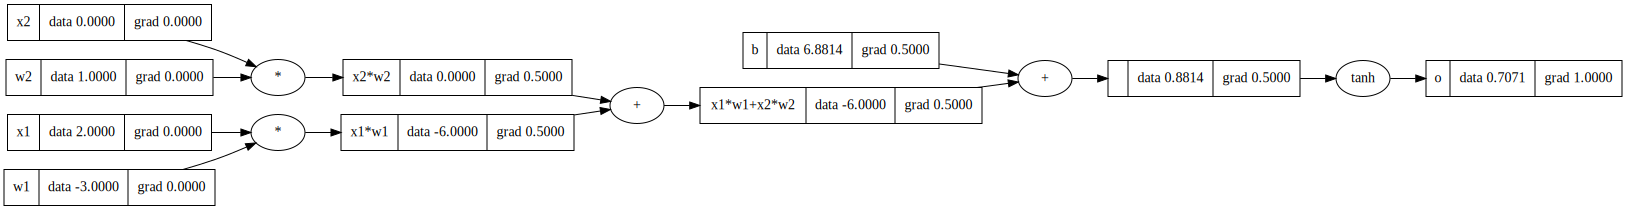

In [37]:
x1w1x2w2._backward()
draw_dot(o)

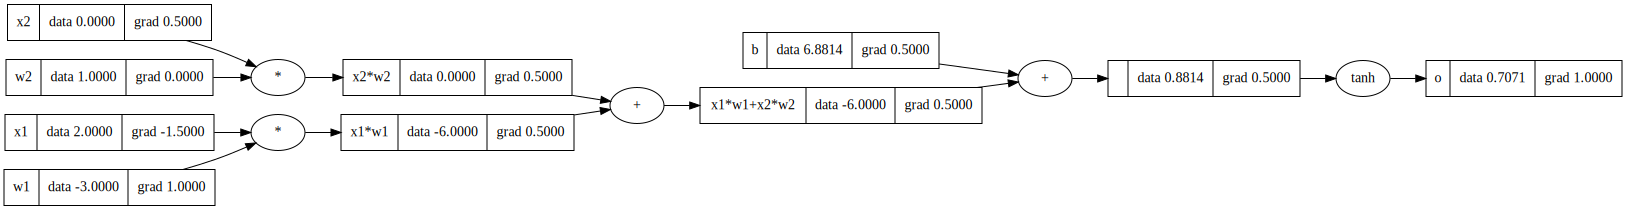

In [38]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

In [39]:
topo=[]
visited=set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value (data=1.0),
 Value (data=0.0),
 Value (data=0.0),
 Value (data=2.0),
 Value (data=-3.0),
 Value (data=-6.0),
 Value (data=-6.0),
 Value (data=6.881373587019543),
 Value (data=0.8813735870195432),
 Value (data=0.7071067811865476)]

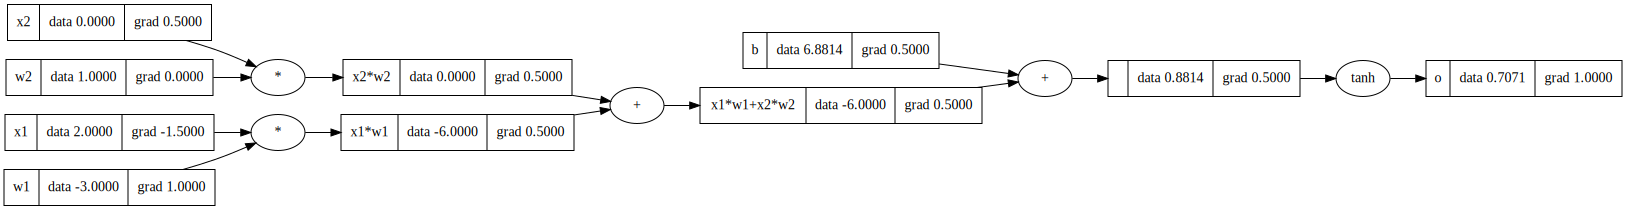

In [40]:
draw_dot(o)

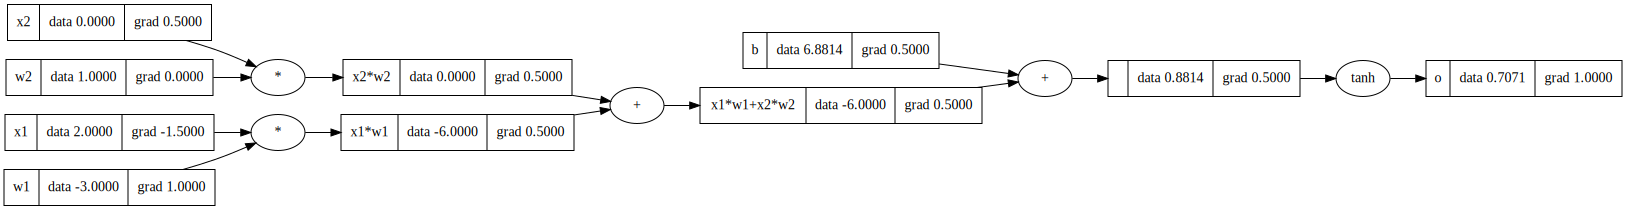

In [41]:
o.grad=1.0

topo=[]
visited=set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)

for node in reversed(topo):
  node._backward()

draw_dot(o)

In [42]:
# Updated code with backward

class Value:
  def __init__(self,data,children={},_ops="",label=""):
    self.data=data
    self.grad=0.0
    self._backward=lambda:None
    self._prev=set(children)
    self._ops=_ops
    self.label=label
  
  def __repr__(self):
    return f"Value (data={self.data})"
  
  def __add__(self,other):
    out=Value(self.data + other.data,(self,other),"+")
    
    def _backward():
      self.grad += 1.0*out.grad
      other.grad += 1.0*out.grad
    out._backward =_backward
    
    return out

  def __mul__(self,other):
    out=Value(self.data*other.data,(self,other),"*")

    def _backward():
      self.grad=other.data*out.grad
      other.grad=self.data*out.grad    
    out._backward=_backward

    return out
  
  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),"tanh")

    def _backward():
      self.grad= (1-t**2)*out.grad
    out._backward=_backward

    return out
  
  def backward(self):
    topo=[]
    visited=set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad=1.0
    for node in reversed(topo):
      node._backward()

a=Value(2.0,label="a")
b=Value(-3.0,label="b")
c=Value(10.0,label="c")
print(a,b)
print(a+b)
print(a.__add__(b))

e=a*b;e.label="e"
d=e+c;d.label="d"
f=Value(-2.0,label="f")
L=d*f;L.label="L"

print(d)
print((a.__mul__(b)).__add__(c))

Value (data=2.0) Value (data=-3.0)
Value (data=-1.0)
Value (data=-1.0)
Value (data=4.0)
Value (data=4.0)


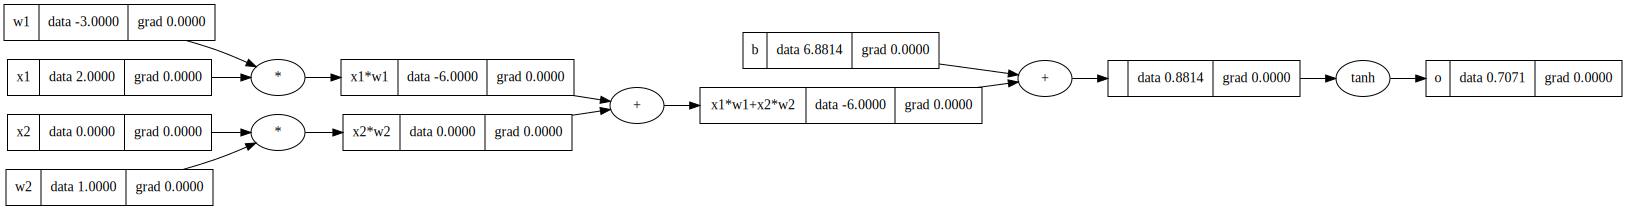

In [43]:
# inputs x1,x2
x1=Value(2.0,label="x1")
x2=Value(0.0,label="x2")

# weights w1,w2
w1=Value(-3.0,label="w1")
w2=Value(1.0,label="w2")

# bias of neuron
b=Value(6.8813735870195432,label="b")

# x1*w1+x2*w2+b
x1w1=x1*w1;x1w1.label="x1*w1"
x2w2=x2*w2;x2w2.label="x2*w2"
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label="x1*w1+x2*w2"
n=x1w1x2w2 + b;label="n"
o=n.tanh();o.label="o"

draw_dot(o)

In [44]:
o.backward()

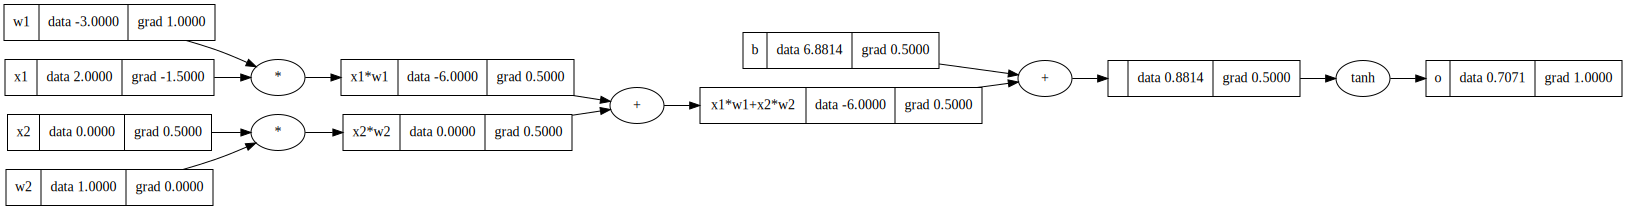

In [45]:
draw_dot(o)

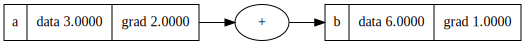

In [46]:
# bug
a=Value(3.0,label="a")
b=a+a;b.label="b"
b.backward()
draw_dot(b)

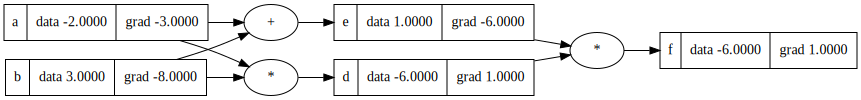

In [47]:
a=Value(-2.0,label="a")
b=Value(3.0,label="b")
d=a*b;d.label="d"
e=a+b;e.label="e"
f=d*e;f.label="f"

f.backward()
draw_dot(f)

# Final


In [48]:
# Visulaizing the maths operations graphs

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes,edges=set(),set()

  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child,v))
        build(child)
  
  build(root)
  return nodes,edges

def draw_dot(root):
  dot=Digraph(format="svg",graph_attr={"rankdir":"LR"}) # LR->left to right

  nodes,edges=trace(root)
  for n in nodes:
    uid=str(id(n))

    # for any value in graph create a rectangular ("record") node for it
    dot.node(name=uid,label="{%s | data %.4f | grad %.4f}" %(n.label,n.data,n.grad),shape="record")
    
    if n._ops:
      dot.node(name=uid+n._ops,label=n._ops)
      dot.edge(uid+n._ops,uid)
  
  for n1,n2 in edges:
    dot.edge(str(id(n1)),str(id(n2))+n2._ops)

  return dot

In [49]:
# Updated code with backward

class Value:
  def __init__(self,data,children={},_ops="",label=""):
    self.data=data
    self.grad=0.0
    self._backward=lambda:None
    self._prev=set(children)
    self._ops=_ops
    self.label=label
  
  def __repr__(self):
    return f"Value (data={self.data})"
  
  def __add__(self,other):
    other=other if isinstance(other,Value) else Value(other)
    out=Value(self.data + other.data,(self,other),"+")
    
    def _backward():
      self.grad += 1.0*out.grad
      other.grad += 1.0*out.grad
    out._backward =_backward
    
    return out
  
  def __radd__(self,other):
    return self+other
  
  def __neg__(self):
    return self*-1
  
  def __sub__(self,other):
    return self +(-other)

  def __mul__(self,other):
    other=other if isinstance(other,Value) else Value(other)
    out=Value(self.data*other.data,(self,other),"*")

    def _backward():
      self.grad=other.data*out.grad
      other.grad=self.data*out.grad    
    out._backward=_backward

    return out
  
  def __pow__(self,other):
    assert isinstance(other,(int,float)), "only supporting int/float powers for now"
    out=Value(self.data**other,(self,),f"**{other}")

    def _backward():
      self.grad += other * (self.data**(other-1)) *out.grad
    out._backward=_backward
    
    return out
    
  def __rmul__(self,other):
    return self*other
  
  def __truediv__(self,other):
    return self*other**-1
  
  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),"tanh")

    def _backward():
      self.grad= (1-t**2)*out.grad
    out._backward=_backward

    return out
  
  def exp(self):
    x=self.data
    out=Value(math.exp(x),(self,),"exp")
    
    def _backward():
      self.grad += out.data*out.grad
    out._backward=_backward
    
    return out
  
  def backward(self):
    topo=[]
    visited=set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad=1.0
    for node in reversed(topo):
      node._backward()

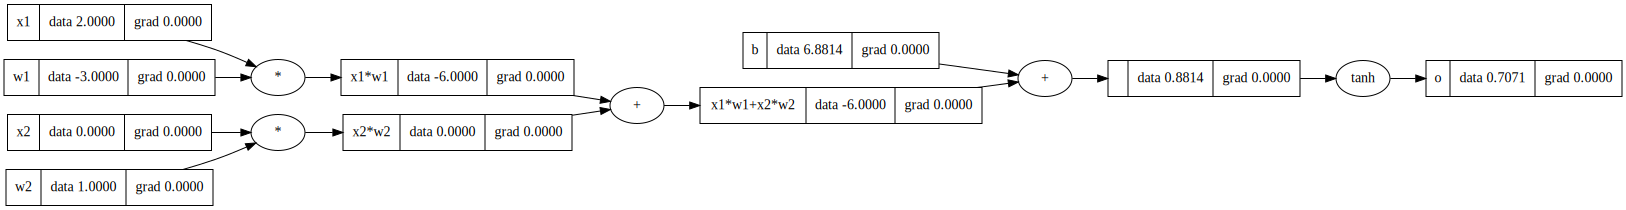

In [50]:
# inputs x1,x2
x1=Value(2.0,label="x1")
x2=Value(0.0,label="x2")

# weights w1,w2
w1=Value(-3.0,label="w1")
w2=Value(1.0,label="w2")

# bias of neuron
b=Value(6.8813735870195432,label="b")

# x1*w1+x2*w2+b
x1w1=x1*w1;x1w1.label="x1*w1"
x2w2=x2*w2;x2w2.label="x2*w2"
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label="x1*w1+x2*w2"
n=x1w1x2w2 + b;label="n"
o=n.tanh();o.label="o"

draw_dot(o)

In [51]:
a=Value(2.0)
b=Value(4.0)
a/b
# a*(1/b)
# a*(b**-1)
a-b 

Value (data=-2.0)

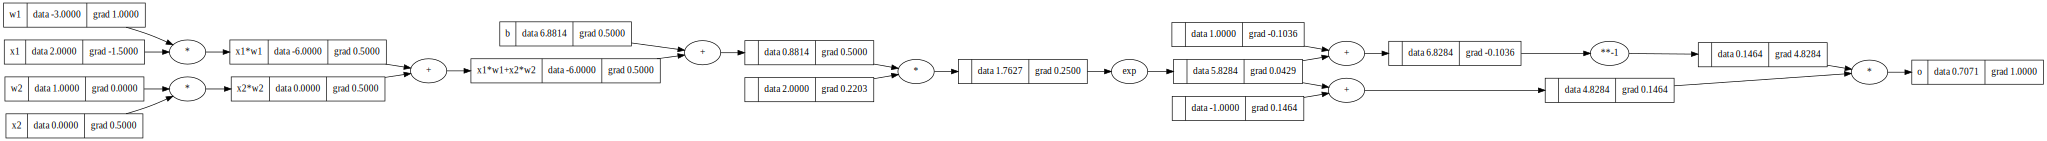

In [52]:
# tanh from scratch
# tanh =(exp(2x)+1)/(exp(2x) -1)

# inputs x1,x2
x1=Value(2.0,label="x1")
x2=Value(0.0,label="x2")

# weights w1,w2
w1=Value(-3.0,label="w1")
w2=Value(1.0,label="w2")

# bias of neuron
b=Value(6.8813735870195432,label="b")

# x1*w1+x2*w2+b
x1w1=x1*w1;x1w1.label="x1*w1"
x2w2=x2*w2;x2w2.label="x2*w2"
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label="x1*w1+x2*w2"
n=x1w1x2w2 + b;label="n"

# o=n.tanh();o.label="o"
e=(2*n).exp()
o=(e-1)/(e+1);o.label="o"

o.backward()

draw_dot(o)

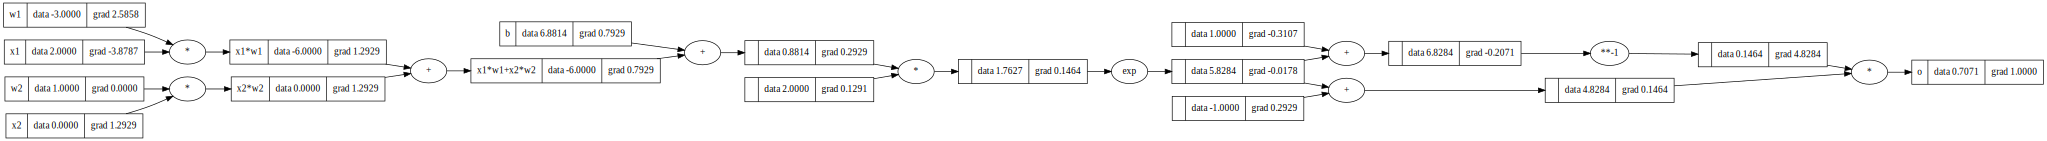

In [53]:
o.backward()
draw_dot(o)

In [54]:
import torch

In [55]:
a=torch.Tensor([[1,2,3],[4,5,6]])
a

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [56]:
a.dtype

torch.float32

In [57]:
a.double().dtype

torch.float64

In [58]:
type(a)

torch.Tensor

In [59]:
x1=torch.Tensor([2.0]).double();  x1.requires_grad=True
x2=torch.Tensor([0.0]).double();  x2.requires_grad=True
w1=torch.Tensor([-3.0]).double(); w1.requires_grad=True
w2=torch.Tensor([1.0]).double();  w2.requires_grad=True
b=torch.Tensor([6.8813735870195432]).double(); b.requires_grad=True

n=x1*w1+x2*w2+b
o=torch.tanh(n)

print(o.data.item())
o.backward()
print("-----")
print(f"x2: {x2.grad.item()}")
print(f"w2: {w2.grad.item()}")
print(f"x1: {x1.grad.item()}")
print(f"w1: {w1.grad.item()}")

0.7071066904050358
-----
x2: 0.5000001283844369
w2: 0.0
x1: -1.5000003851533106
w1: 1.0000002567688737


In [60]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [61]:
o.data.item()

0.7071066904050358

In [62]:
o.item()

0.7071066904050358

In [63]:
a

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [64]:
a.data

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [65]:
x2.grad

tensor([0.5000], dtype=torch.float64)

In [66]:
import random

In [67]:
class Neuron:
  def __init__(self,nin):
    self.w=[Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b=Value(random.uniform(-1,1))
  
  def __call__(self,x):
    # y = w*x+b
    act =sum ((wi*xi for wi,xi in zip(self.w,x)),self.b)
    out=act.tanh()
    return out

class Layer:
  def __init__(self,nin,nout):
    self.neurons=[Neuron(nin) for _ in range(nout)]
  
  def __call__(self,x):
    outs=[n(x) for n in self.neurons]
    return outs[0] if len(outs) ==1 else outs

class MLP:
  def __init__(self,nin,nouts):
    sz=[nin]+nouts
    self.layers=[Layer(sz[i],sz[i+1]) for i in range(len(nouts))]

  def __call__(self,x):
    for layer in self.layers:
      x=layer(x)
    return x

# x=[2.0,3.0]
# n=Neuron(2)
# n(x)

# x=[2.0,3.0]
# l=Layer(2,3)
# l(x)

x=[2.0,3.0,-1.0]
n=MLP(3,[4,4,1])
n(x)

Value (data=-0.7066859721681534)

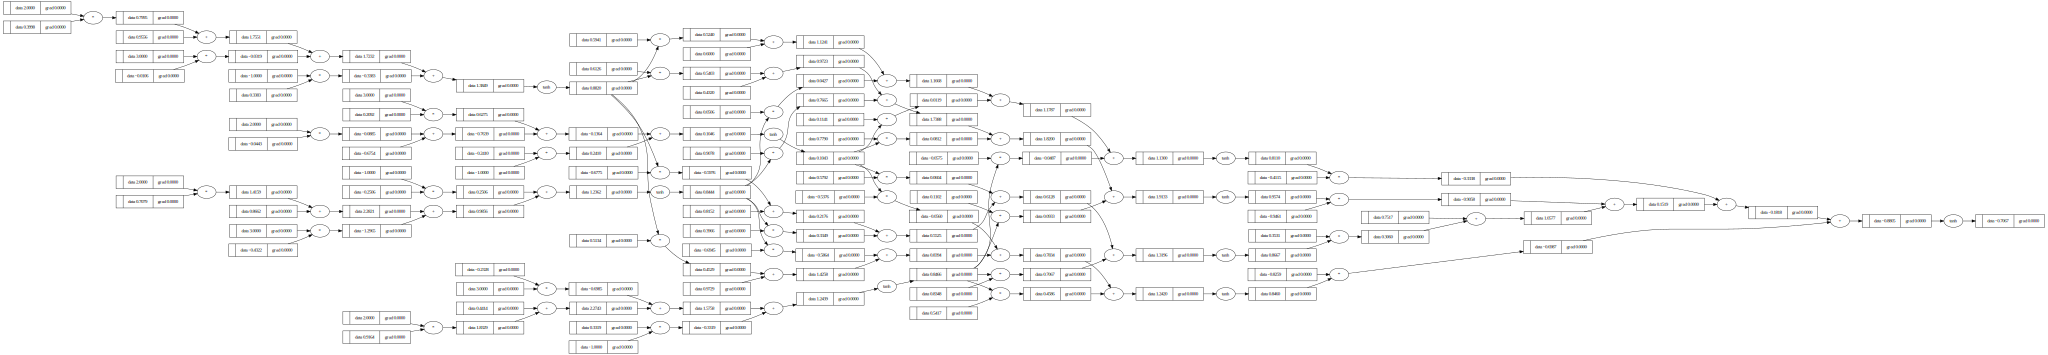

In [68]:
draw_dot(n(x))

In [69]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0],
]
ys=[1.0,-1.0,-1.0,1.0]
ypred=[n(x) for x in xs]
ypred

[Value (data=-0.7066859721681534),
 Value (data=-0.7353002770923079),
 Value (data=-0.7060698904073214),
 Value (data=-0.6961162900898732)]

In [72]:
[(yout-ygt)**2 for ygt,yout in zip(ys,ypred)]

[Value (data=2.9127770075955546),
 Value (data=0.07006594330740895),
 Value (data=0.08639490932516407),
 Value (data=2.876810469508235)]

In [75]:
[(yout-ygt) for ygt,yout in zip(ys,ypred)]

[Value (data=-1.7066859721681533),
 Value (data=0.26469972290769206),
 Value (data=0.2939301095926786),
 Value (data=-1.6961162900898732)]

In [77]:
loss=sum((yout-ygt)**2 for ygt,yout in zip(ys,ypred))
loss

Value (data=5.946048329736362)

In [78]:
loss.backward()

In [81]:
n.layers[0].neurons[0].w[0]

Value (data=0.39975923396813906)

In [82]:
n.layers[0].neurons[0].w[0].grad

0.07120720092569446

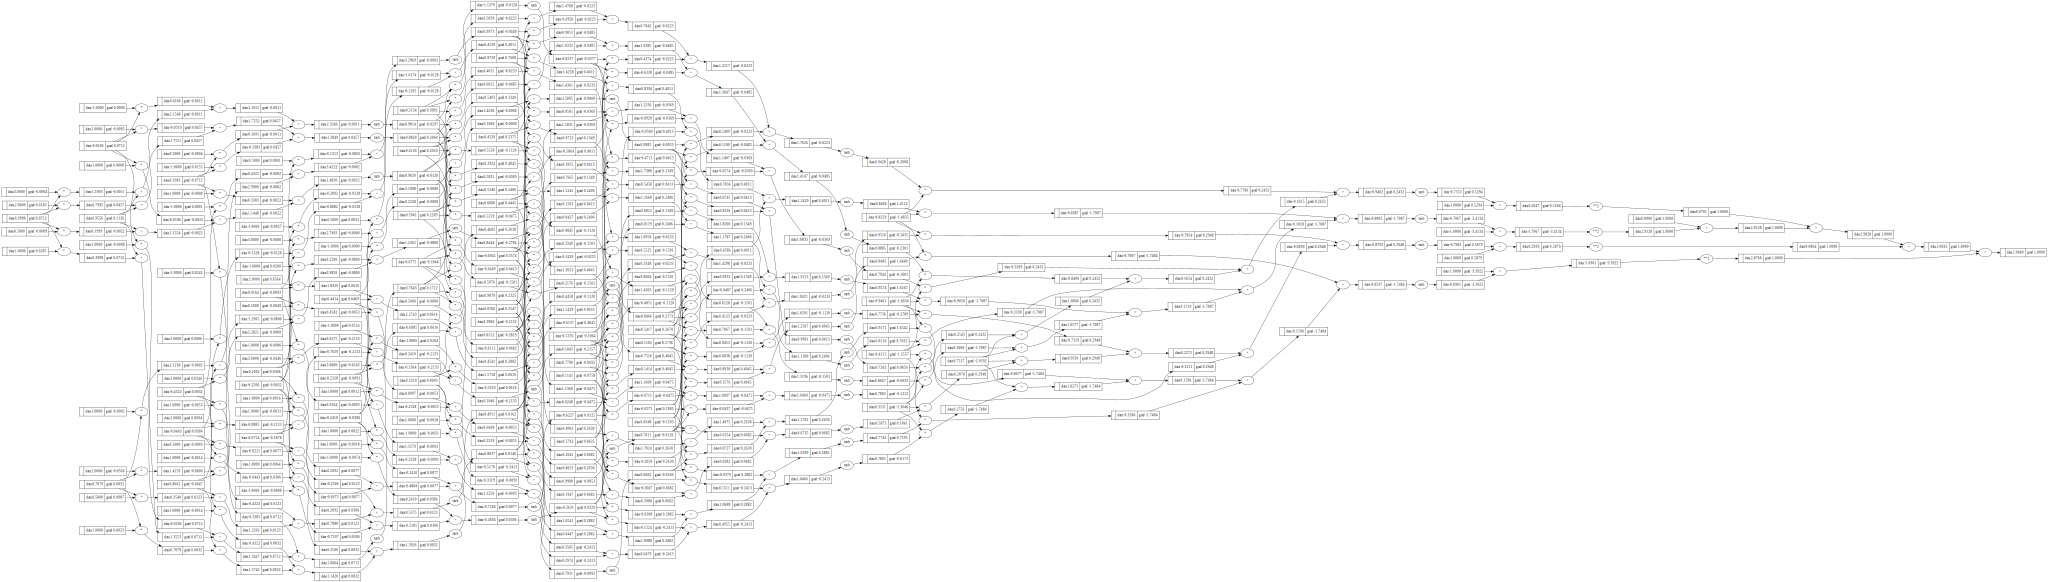

In [83]:
draw_dot(loss)

In [85]:
class Neuron:
  def __init__(self,nin):
    self.w=[Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b=Value(random.uniform(-1,1))
  
  def __call__(self,x):
    # y = w*x+b
    act =sum ((wi*xi for wi,xi in zip(self.w,x)),self.b)
    out=act.tanh()
    return out
  
  def parameters(self):
    return self.w +[self.b]

class Layer:
  def __init__(self,nin,nout):
    self.neurons=[Neuron(nin) for _ in range(nout)]
  
  def __call__(self,x):
    outs=[n(x) for n in self.neurons]
    return outs[0] if len(outs) ==1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  def __init__(self,nin,nouts):
    sz=[nin]+nouts
    self.layers=[Layer(sz[i],sz[i+1]) for i in range(len(nouts))]

  def __call__(self,x):
    for layer in self.layers:
      x=layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]


In [87]:
x=[2.0,3.0,-1.0]
n=MLP(3,[4,4,1])
n(x)

Value (data=0.37940894596322655)

In [89]:
len(n.parameters())

41

In [90]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0],
]
ys=[1.0,-1.0,-1.0,1.0]
ypred=[n(x) for x in xs]
ypred

[Value (data=0.37940894596322655),
 Value (data=0.5884842826550782),
 Value (data=0.0031193166606452946),
 Value (data=0.19496402715940123)]

In [91]:
loss=sum((yout-ygt)**2 for ygt,yout in zip(ys,ypred))
loss

Value (data=4.5627468536178215)

In [103]:
loss.backward()

In [104]:
n.layers[0].neurons[0].w[0]

Value (data=-0.8138231034664082)

In [105]:
n.layers[0].neurons[0].w[0].grad

0.0028886102711727516

In [106]:
n.layers[0].neurons[0].w[0].data

-0.8138231034664082

In [99]:
for p in n.parameters():
  p.data += -0.01*p.grad

In [100]:
n.layers[0].neurons[0].w[0].data

-0.8138231034664082

In [101]:
n.layers[0].neurons[0].w[0].grad

-0.006430577066100923

In [102]:
ypred=[n(x) for x in xs]
ypred
loss=sum((yout-ygt)**2 for ygt,yout in zip(ys,ypred))
loss

Value (data=4.5338195946259034)

### training loop

In [119]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0],
]
ys=[1.0,-1.0,-1.0,1.0]

In [120]:
num_epochs=20

In [121]:
lr=0.05

In [122]:
for k in range(num_epochs):
  # forward pass
  ypred=[n(x) for x in xs]
  loss=sum((yout-ygt)**2 for ygt,yout in zip(ys,ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad=0.0
  loss.backward()

  # update
  for p in n.parameters():
    p.data+= -lr*p.grad
  
  print(k,loss.data)

0 0.15384425523917955
1 0.1532516181393022
2 0.1527381481731756
3 0.15205936181430177
4 0.15117556855518813
5 0.1373335530581985
6 0.1300481921390817
7 0.12878997496445685
8 0.12828526551920552
9 0.12792340946227368
10 0.12691838572512743
11 0.12653440463461813
12 0.11800123679115312
13 0.117558746539549
14 0.11233243044148633
15 0.11172473016900805
16 0.11125735456931193
17 0.11095329239763059
18 0.110206032390431
19 0.10991903174368756


In [123]:
ypred

[Value (data=0.889346258032897),
 Value (data=-0.8138793555761917),
 Value (data=-0.7986743350769864),
 Value (data=0.8499937884788162)]